# [editted]_Coding exercise 7

### Task 7.1
##### Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend?

In [17]:
import os
import pandas as pd
path_homework7= "/Users/[editted]/Documents/BC/SOCY7700/compSoc/homework 7"
os.chdir(path_homework7)

crime20192020_df = pd.concat(
    map(pd.read_csv, ['2019 Boston crime incident reports.csv', '2020 Boston crime incident reports.csv']), ignore_index=True)
crime20192020_dropdu_df=crime20192020_df.drop_duplicates(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
cleaned_crime_df=crime20192020_dropdu_df.dropna(how='any',subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
cleaned_crime_df.to_csv('cleaned_crime_data.csv', index=False)

cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')

cleaned_crime_df['offense_type'] = None
cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'

describe_by_offense = cleaned_crime_df.groupby(['offense_type',"YEAR"]).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
print(describe_by_offense)


/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2032407611.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20192020_df = pd.concat(
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2032407611.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20192020_df = pd.concat(
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2032407611.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2032407611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime_df['

     offense_type  YEAR  INCIDENT_NUMBER
0  property crime  2019            13158
1  property crime  2020            12227
2   violent crime  2019             8324
3   violent crime  2020             5152


##### Do you see any trend?
* THe number of property crime and violent crime both declined from 2019 t0 2020.

### Task 7.2
##### Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years.

/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2399488800.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2399488800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1_crime_df['violent crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/2399488800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

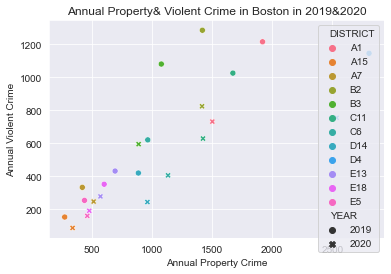

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

path_homework7= "/Users/apple/Documents/BC/SOCY7700/compSoc/homework 7"
os.chdir(path_homework7)

cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
cleaned1_crime_df = cleaned_crime_df[cleaned_crime_df.DISTRICT != 'External']


cleaned1_crime_df['violent crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')
cleaned1_crime_df['property crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')
describe1_by_offense = cleaned1_crime_df.groupby(["YEAR","DISTRICT"]).agg({'violent crime': 'sum','property crime': 'sum' }).reset_index()
fig = sns.scatterplot(x='property crime', y='violent crime', data=describe1_by_offense, hue='DISTRICT',style="YEAR")
plt.xlabel("Annual Property Crime")
plt.ylabel("Annual Violent Crime")
plt.title("Annual Property& Violent Crime in Boston in 2019&2020")
plt.savefig('Annual Property& Violent Crime in Boston in 2019&2020.png')

### Task 7.3
##### Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years.

/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/4078493183.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/4078493183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1_crime_df['violent crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/4078493183.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

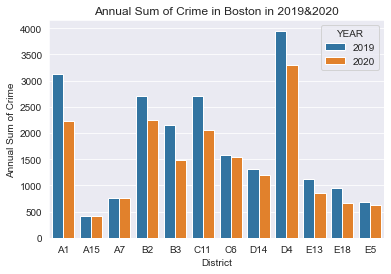

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

path_homework7= "/Users/apple/Documents/BC/SOCY7700/compSoc/homework 7"
os.chdir(path_homework7)

cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
cleaned1_crime_df = cleaned_crime_df[cleaned_crime_df.DISTRICT != 'External']

cleaned1_crime_df['violent crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')
cleaned1_crime_df['property crime']=cleaned1_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')
cleaned1_crime_df['annual sum']=(cleaned1_crime_df['violent crime']+cleaned1_crime_df['property crime'])

describe2_by_offense = cleaned1_crime_df.groupby(["YEAR","DISTRICT"]).agg({'annual sum': 'sum'}).reset_index()

fig = sns.barplot(x='DISTRICT', y='annual sum', data=describe2_by_offense, hue='YEAR')
plt.xlabel("District")
plt.ylabel("Annual Sum of Crime")
plt.title("Annual Sum of Crime in Boston in 2019&2020")
plt.savefig('Annual Sum of Crime in Boston in 2019&2020.png')

### Task 7.4
##### Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/766101531.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_6619/766101531.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1_crime_df['quarter'] = cleaned1_crime_df.apply(my_func, axis=1)


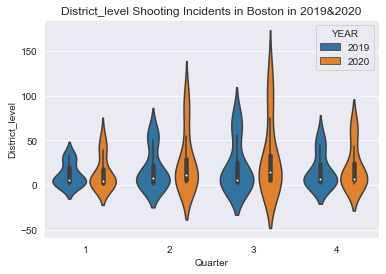

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

path_homework7= "/Users/apple/Documents/BC/SOCY7700/compSoc/homework 7"
os.chdir(path_homework7)

cleaned_crime_df = pd.read_csv('cleaned_crime_data.csv')
cleaned1_crime_df = cleaned_crime_df[cleaned_crime_df.DISTRICT != 'External']
def my_func(row):
    if row['MONTH'] ==1 or row['MONTH'] ==2 or row['MONTH'] ==3:
        val = 1
    elif row['MONTH'] ==4 or row['MONTH'] ==5 or row['MONTH'] ==6:
        val = 2
    elif row['MONTH'] ==7 or row['MONTH'] ==8 or row['MONTH'] ==9:
        val = 3
    else:
        val = 4
    return val

cleaned1_crime_df['quarter'] = cleaned1_crime_df.apply(my_func, axis=1)

describe_by_quarter = cleaned1_crime_df.groupby(['quarter', 'DISTRICT',"YEAR"]).agg({'SHOOTING': 'sum'}).reset_index()
fig = sns.violinplot(x='quarter', y='SHOOTING', data=describe_by_quarter, hue='YEAR')
plt.xlabel("Quarter")
plt.ylabel("District_level")
plt.title("District_level Shooting Incidents in Boston in 2019&2020")
plt.savefig('District_level Shooting Incidents in Boston in 2019&2020.png')
